In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
category_df = pd.read_csv('./data/category.csv')
data_df = pd.read_csv('./data/train/train.csv')

# 적정 pos_weight 계산

In [9]:
data_df['n_label'] = data_df['SSnos'].apply(lambda x: x.count(' ') + 1)

In [18]:
564 * 60000 / data_df['n_label'].sum()

472.2233851048688

# 계층간 데이터 양 분석

In [3]:
category_df

,SSno,SStext,Sno,Stext,Mno,Mtext,Lno,Ltext,LLno,LLtext
0,1110,곡물 및 기타 식량작물 재배업,111,곡물 및 기타 식량작물 재배업,11,작물 재배업,1,농업,A,"농업, 임업 및 어업(01~03)"
1,1121,채소작물 재배업,112,"채소, 화훼작물 및 종묘 재배업",11,작물 재배업,1,농업,A,"농업, 임업 및 어업(01~03)"
2,1122,화훼작물 재배업,112,"채소, 화훼작물 및 종묘 재배업",11,작물 재배업,1,농업,A,"농업, 임업 및 어업(01~03)"
3,1123,종자 및 묘목 생산업,112,"채소, 화훼작물 및 종묘 재배업",11,작물 재배업,1,농업,A,"농업, 임업 및 어업(01~03)"
4,1131,과실작물 재배업,113,"과실, 음료용 및 향신용 작물 재배업",11,작물 재배업,1,농업,A,"농업, 임업 및 어업(01~03)"
...,...,...,...,...,...,...,...,...,...,...
559,61299,그 외 기타 전기 통신업,6129,기타 전기 통신업,612,전기 통신업,61,우편 및 통신업,J,정보통신업(58~63)
560,62010,컴퓨터 프로그래밍 서비스업,6201,컴퓨터 프로그래밍 서비스업,620,"컴퓨터 프로그래밍, 시스템 통합 및 관리업",62,"컴퓨터 프로그래밍, 시스템 통합 및 관리업",J,정보통신업(58~63)
561,62021,컴퓨터 시스템 통합 자문 및 구축 서비스업,6202,"컴퓨터 시스템 통합 자문, 구축 및 관리업",620,"컴퓨터 프로그래밍, 시스템 통합 및 관리업",62,"컴퓨터 프로그래밍, 시스템 통합 및 관리업",J,정보통신업(58~63)
562,62022,컴퓨터시설 관리업,6202,"컴퓨터 시스템 통합 자문, 구축 및 관리업",620,"컴퓨터 프로그래밍, 시스템 통합 및 관리업",62,"컴퓨터 프로그래밍, 시스템 통합 및 관리업",J,정보통신업(58~63)


In [51]:
category_df['LLno'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'J'], dtype=object)

In [52]:
category_df = category_df[['LLno', 'Lno', 'Mno', 'Sno', 'SSno']]

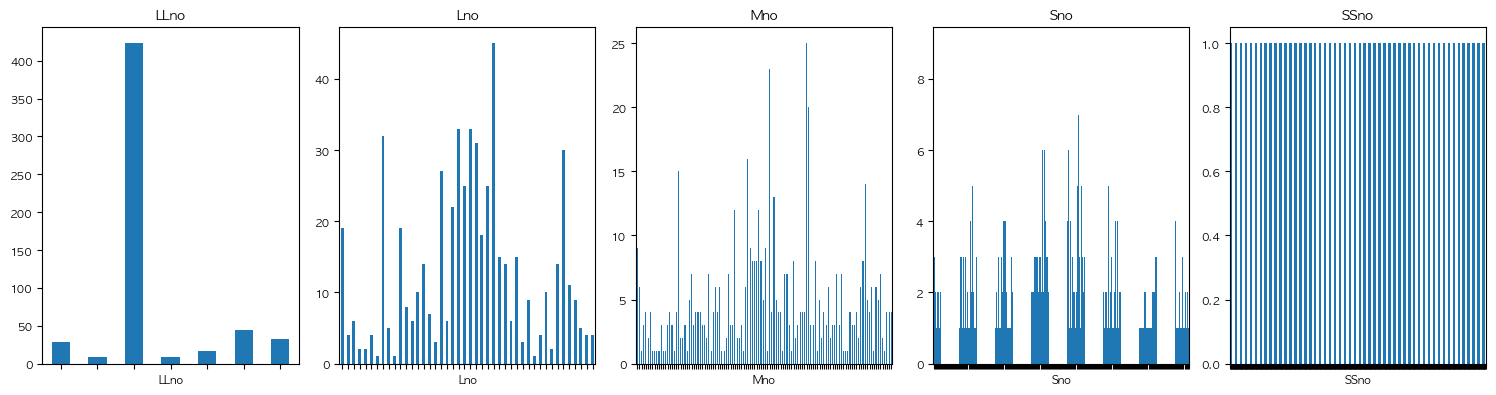

In [53]:
def show_graph(df):
    fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 4))
    for i, col in enumerate(df.columns):
        counts = df[col].value_counts()
        counts = counts.reindex(sorted(counts.index))  # x축 값을 컬럼 이름 순서대로 정렬
        counts.plot(kind='bar', ax=axes[i], title=col, legend=False)  # x축 값 이름 숨김
        plt.setp(axes[i].get_xticklabels(), visible=False)  # x축 라벨 숨김

    plt.tight_layout()
    plt.show()

show_graph(category_df)

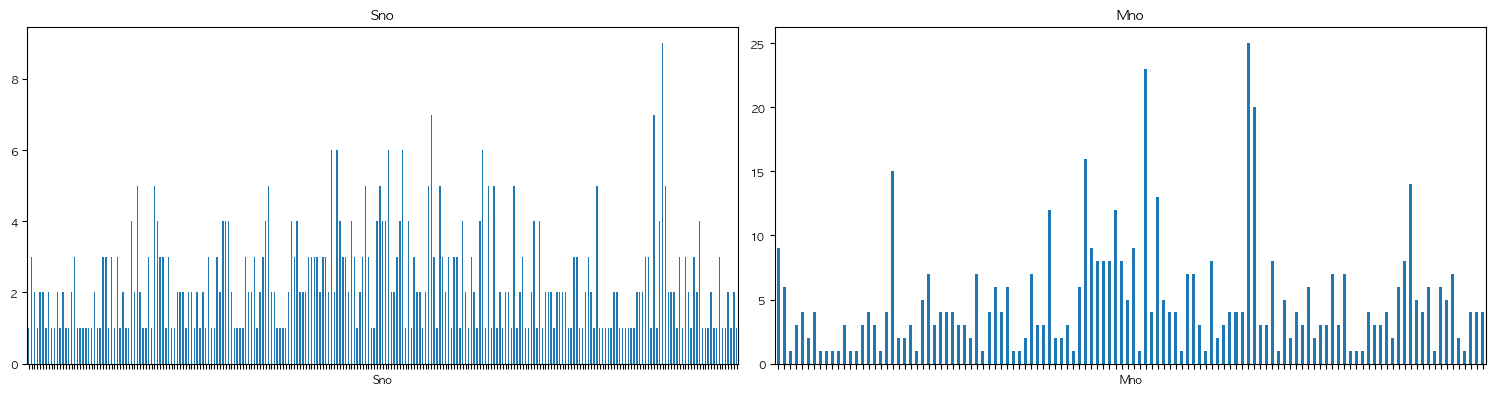

In [54]:
show_graph(category_df[['Sno', 'Mno']])

In [59]:
category_df

,LLno,Lno,Mno,Sno,SSno
0,A,1,11,111,1110
1,A,1,11,112,1121
2,A,1,11,112,1122
3,A,1,11,112,1123
4,A,1,11,113,1131
...,...,...,...,...,...
559,J,61,612,6129,61299
560,J,62,620,6201,62010
561,J,62,620,6202,62021
562,J,62,620,6202,62022


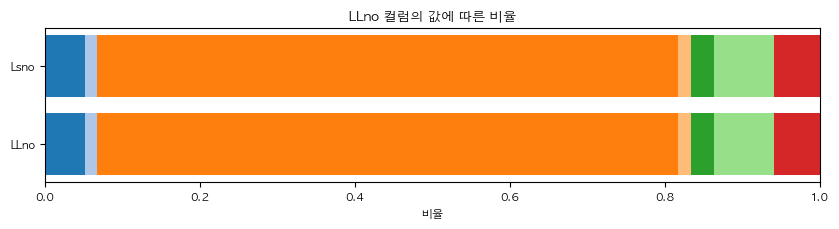

In [57]:
value_counts = category_df['LLno'].value_counts(normalize=True).sort_index()

# 시작 위치 초기화
start = 0

# 각 범주를 나타내는 막대의 끝 위치
positions = []
for value in value_counts:
    end = start + value
    positions.append((start, end))
    start = end

# 단일 막대 그래프로 표현
plt.figure(figsize=(10, 2))
for (start, end), color in zip(positions, plt.cm.tab20.colors):
    plt.barh('LLno', end-start, left=start, color=color)
plt.title('LLno 컬럼의 값에 따른 비율')
plt.xlabel('비율')
plt.xlim(0, 1)  # X 축의 한계 설정
plt.show()

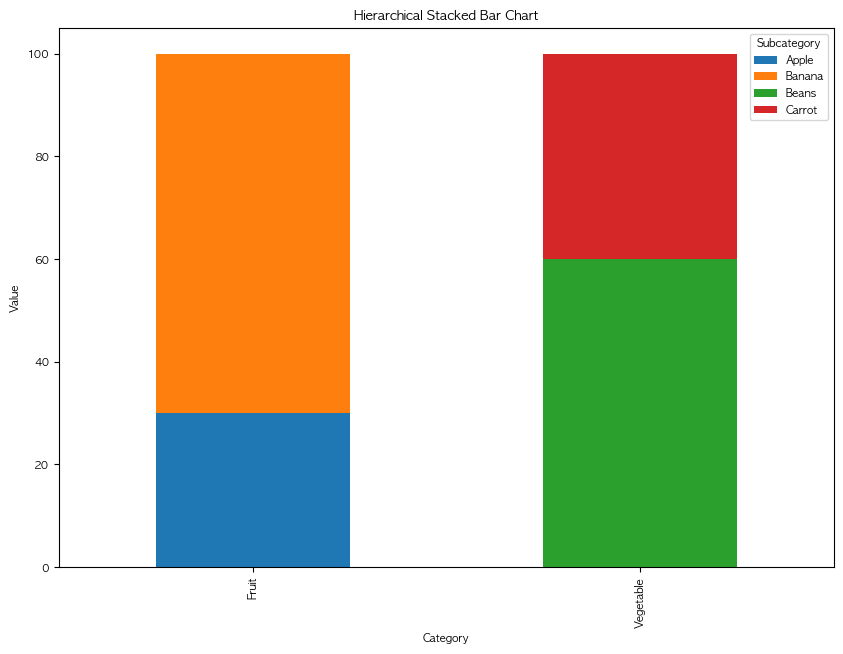

In [47]:
# 예시 데이터프레임 생성
data = {
    'Category': ['Fruit', 'Fruit', 'Vegetable', 'Vegetable'],
    'Subcategory': ['Apple', 'Banana', 'Carrot', 'Beans'],
    'Value': [30, 70, 40, 60]
}

df = pd.DataFrame(data)

# 계층적 스택 바 차트를 위해 데이터를 재구성
pivot_df = df.pivot(index='Category', columns='Subcategory', values='Value')

# 스택 바 차트 그리기
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Hierarchical Stacked Bar Chart')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()